In [4]:
import pandas as pd
import numpy as np
import json
import glob
import tqdm
import seaborn as sns
import matplotlib.pylab as plt

import warnings
warnings.filterwarnings("ignore")

from model_drift import settings, helpers

In [5]:
def jsonl_files2dataframe(jsonl_files, converter=None):
    if converter is None:
        converter = lambda x: x

    df = []
    for fn in tqdm.tqdm(jsonl_files):
        with open(fn, 'r') as f:
            for line in tqdm.tqdm_notebook(f.readlines()):
                df.append(converter(json.loads(line)))
    return pd.json_normalize(df)


In [8]:
jsonl_dir = str(settings.TOP_DIR.joinpath("results", 'classifier', 'finetuned'))
jsonl_files = glob.glob(f"{jsonl_dir}/preds.jsonl")

df = helpers.jsonl_files2dataframe(jsonl_files)

df

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/160819 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:03<00:00,  3.01s/it]


,index,score,activation,label
0,20536686640136348236148679891455886468_k6ga29.png,"[-2.9898717403411865, 0.021230269223451614, -5...","[0.04788553714752197, 0.5053073763847351, 0.00...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
1,113855343774216031107737439268243531979_3k951n...,"[-4.271155834197998, -3.2341253757476807, -7.5...","[0.013773280195891857, 0.03790152817964554, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,313723174271082992847610802266403640553-4_hhi4...,"[-1.9546648263931274, -4.485781669616699, -1.7...","[0.12404559552669525, 0.011142521165311337, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,105529804483623054726294337265160703666_6zn76a...,"[-2.843719244003296, -2.7252206802368164, -5.9...","[0.055006884038448334, 0.06150144338607788, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,102185472428957491598043403159908631419_zb8kco...,"[-2.794471502304077, -4.529303073883057, -5.34...","[0.05762365832924843, 0.01067304890602827, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...
160814,216840111366964012904401302362010328091616774_...,"[-1.6075669527053833, -3.6497890949249268, -3....","[0.16692669689655304, 0.025337910279631615, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
160815,1284011361929414524688838311696751542351444145...,"[-2.746262311935425, -4.371530532836914, -2.12...","[0.06029808521270752, 0.012474318034946918, 0....","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
160816,1284011361929414524678386411696751542351444145...,"[-4.972005367279053, -2.931608200073242, -6.48...","[0.0068815541453659534, 0.05061299353837967, 0...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
160817,1284011361929414522079841201696751542351444145...,"[-3.2092111110687256, -3.9268999099731445, -3....","[0.03882056102156639, 0.019323892891407013, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."


In [9]:
from model_drift.data.padchest import PadChest

pc = PadChest.from_csv()
pc.prepare()

pc.merge(df, left_on="ImageID", right_on="index", how='inner')
pc.df.head()

,ImageID,ImageDir,StudyDate_DICOM,StudyID,PatientID,PatientBirth,PatientSex_DICOM,ViewPosition_DICOM,Projection,MethodProjection,...,Pleural Abnormalities,Pleural Effusion,Pneumonia,StudyDate,Frontal,age,index,score,activation,label
0,20536686640136348236148679891455886468_k6ga29.png,0,20140915,20536686640136348236148679891455886468,839860488694292331637988235681460987,1930-01-01,F,POSTEROANTERIOR,PA,Manual review of DICOM fields,...,0,0,0,2014-09-15,True,84.705367,20536686640136348236148679891455886468_k6ga29.png,"[-2.9898717403411865, 0.021230269223451614, -5...","[0.04788553714752197, 0.5053073763847351, 0.00...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
1,135803415504923515076821959678074435083_fzis7d...,0,20150914,135803415504923515076821959678074435083,313572750430997347502932654319389875966,1929-01-01,M,LATERAL,L,Manual review of DICOM fields,...,0,0,0,2015-09-14,False,86.701301,135803415504923515076821959678074435083_fzis7d...,"[-3.224487066268921, 0.4518917202949524, -6.09...","[0.03825455904006958, 0.6110888719558716, 0.00...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
2,135803415504923515076821959678074435083_fzis7b...,0,20150914,135803415504923515076821959678074435083,313572750430997347502932654319389875966,1929-01-01,M,POSTEROANTERIOR,PA,Manual review of DICOM fields,...,0,0,0,2015-09-14,True,86.701301,135803415504923515076821959678074435083_fzis7b...,"[-2.1421587467193604, -1.9091078042984009, -4....","[0.10506623238325119, 0.129081130027771, 0.007...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
3,113855343774216031107737439268243531979_3k951l...,0,20150717,113855343774216031107737439268243531979,50783093527901818115346441867348318648,1925-01-01,F,POSTEROANTERIOR,PA,Manual review of DICOM fields,...,0,0,0,2015-07-17,True,90.539847,113855343774216031107737439268243531979_3k951l...,"[-3.166491985321045, -2.5237503051757812, -6.7...","[0.04044634476304054, 0.07420986890792847, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,113855343774216031107737439268243531979_3k951n...,0,20150717,113855343774216031107737439268243531979,50783093527901818115346441867348318648,1925-01-01,F,LATERAL,L,Manual review of DICOM fields,...,0,0,0,2015-07-17,False,90.539847,113855343774216031107737439268243531979_3k951n...,"[-4.271155834197998, -3.2341253757476807, -7.5...","[0.013773280195891857, 0.03790152817964554, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [10]:
train, val, test = pc.split(settings.PADCHEST_SPLIT_DATES, studydate_index=True)

In [11]:

from model_drift.drift.base import BaseDriftCalculator
from model_drift.drift.tabular import TabularDriftCalculator

In [76]:
sample = test.df.sample(200)

labels = np.stack(sample['label'].values)
scores = np.stack(sample['score'].values)

labels.sum(axis=0)

array([19., 25.,  4.,  0.,  8., 66., 33., 15.,  7.,  5.])

In [77]:
import torch
from torchmetrics import AUROC
from torchmetrics.functional import auroc

def macro_auc(scores, labels, skip_missing=True):
    if len(scores) == 0:
        return float('NaN')
    N = labels.shape[1]
    aucs = [0]*N
    for i in range(N):
        try:
            aucs[i] = auroc(torch.tensor(scores[i]), torch.tensor(labels[i]).long()).numpy()
        except Exception as e:
            if "No positive samples in targets" not in str(e):
                raise
            aucs[i] = float('NaN')

    aucs = np.array(aucs)
    c = (~np.isnan(aucs)).sum() if skip_missing else N
    return np.nansum(aucs)/c

def micro_auc(scores, labels):
    return float(auroc(torch.tensor(scores), torch.tensor(labels).long(), average='micro').numpy())


micro_auc(scores, labels)

(200, 10) (200, 10)


0.904550313949585

In [80]:
sample = sample_frame(pc.df.set_index('StudyDate')[['score', 'label']], "2009-01-05")

class AUROCCalculator(BaseDriftCalculator):
    name = "auroc"
    def __init__(self, ref=None, label_col=None, score_col=None, average='micro', ignore_nan=True):
        super().__init__(None)
        self.label_col = label_col
        self.score_col = score_col
        self.average = average

    def predict(self, sample):
        print(len(sample))
        labels = sample.iloc[:, 1] if self.label_col is None else sample[self.label_col]
        scores = sample.iloc[:, 0] if self.score_col is None else sample[self.score_col]
        labels = np.stack(labels.values)
        scores = np.stack(scores.values)

        print(scores.shape, labels.shape)

        if self.average == "macro":
            return macro_auc(scores, labels)
        return micro_auc(scores, labels)
        
cd = AUROCCalculator()

cd.predict(sample[list(("score", "label"))])

217
(217, 10) (217, 10)
(200, 10) (217, 10)


ValueError: The `preds` and `target` should have the same first dimension.

In [79]:
from model_drift.drift.numeric import KSDriftCalculator, BasicDriftCalculator
from model_drift.drift.categorical import ChiSqDriftCalculator

from model_drift.drift.tabular import TabularDriftCalculator

dwc = TabularDriftCalculator(train.df)

dwc.add_drift_stat(("score", "label"), AUROCCalculator)

# dwc.add_drift_stat('age', KSDriftCalculator)
# dwc.add_drift_stat('RelativeXRayExposure_DICOM', KSDriftCalculator)
# dwc.add_drift_stat('WindowCenter_DICOM', KSDriftCalculator)
# dwc.add_drift_stat('WindowWidth_DICOM', KSDriftCalculator)

# dwc.add_drift_stat('age', BasicDriftCalculator)
# dwc.add_drift_stat('RelativeXRayExposure_DICOM', BasicDriftCalculator)
# dwc.add_drift_stat('WindowCenter_DICOM', BasicDriftCalculator)
# dwc.add_drift_stat('WindowWidth_DICOM', BasicDriftCalculator)


# dwc.add_drift_stat('Projection', ChiSqDriftCalculator)
# dwc.add_drift_stat('PatientSex_DICOM', ChiSqDriftCalculator)
# dwc.add_drift_stat('Modality_DICOM', ChiSqDriftCalculator)

dwc.prepare()

dwc._metric_collections
results = dwc.predict(sample)

results

200
(200, 10) (200, 10)
(200, 10) (200, 10)


{('score', 'label'): {'auroc': 0.904550313949585}, 'count': 200}

In [71]:
def sample_frame(df, day, window='30D'):
    day_dt = pd.to_datetime(day)
    delta = pd.tseries.frequencies.to_offset(window)
    return df.loc[str(day_dt - delta):str(day_dt)]





,score,label
StudyDate,,
2009-01-01,"[-2.717344284057617, -2.160416603088379, -4.56...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2009-01-01,"[0.10726103186607361, -1.5257314443588257, -5....","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2009-01-05,"[-4.2155442237854, -5.5012102127075195, -5.245...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
2009-01-05,"[-4.403317928314209, -7.054161071777344, -6.42...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
2009-01-05,"[-3.0673325061798096, -0.6663748025894165, -4....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, ..."
...,...,...
2009-01-02,"[-3.667210102081299, 0.07945184409618378, -3.7...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, ..."
2009-01-02,"[-3.3252975940704346, -0.948869526386261, -4.6...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ..."
2009-01-02,"[-2.1527950763702393, -2.3758788108825684, -2....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."


In [74]:
labels = sample.iloc[:, 1]
scores = sample.iloc[:, 0]
labels = np.stack(labels.values)
scores = np.stack(scores.values)

labels.shape, scores.shape



((200,), (200,))

In [68]:
output = dwc.rolling_window_predict(pc.df.set_index('StudyDate'),
                                    stride='D', window='30D', min_periods=200)
output

2007-05-03 - 2017-11-17:  16%|█▌        | 613/3852 [00:02<00:11, 285.91it/s, 2009-01-05]

(200, 10) (217, 10)


ValueError: The `preds` and `target` should have the same first dimension.

In [47]:
output[['score']].to_csv(settings.TOP_DIR.joinpath("results", "drift_csvs", "perf_D-30D.csv"))

In [30]:
output['score']['label'].sort_values(by='auroc', ascending=False).iloc[:50]

,auroc
2010-10-14,1.0
2012-02-22,1.0
2012-05-27,1.0
2012-01-28,1.0
2012-03-23,1.0
2009-04-16,1.0
2011-06-23,1.0
2010-04-22,1.0
2010-04-23,1.0
2009-04-08,1.0


In [17]:
output["Modality_DICOM"] = output["Modality_DICOM"].fillna(0)
output.head()

Modality_DICOM                                   PatientSex_DICOM  \
                     chi2                                               chi2   
            critical_diff critical_value distance  dof pval    critical_diff   
2009-01-05            0.0            0.0      0.0  0.0  1.0        -6.203358   
2009-01-06            0.0            0.0      0.0  0.0  1.0        -6.171402   
2009-01-07            0.0            0.0      0.0  0.0  1.0        -5.204224   
2009-01-08            0.0            0.0      0.0  0.0  1.0        -6.039569   
2009-01-09            0.0            0.0      0.0  0.0  1.0        -4.718430   

                                                    ... WindowWidth_DICOM  \
                                                    ...             stats   
           critical_value  distance  dof      pval  ...               std   
2009-01-05       6.251389  0.048031  3.0  0.997240  ...        945.868350   
2009-01-06       6.251389  0.079987  3.0  0.994126  ...        951.727542   
2009-01-07       6.251389  1.047164  3.0  0.789842  ...        885.288343   
2009-01-08       6.251389  0.211820  3.0  0.975659  ...        877.539719   
2009-01-09       6.251389  1.532959  3.0  0.674685  ...        871.908801   

                     age                                                    \
                      ks                                             stats   
           critical_diff critical_value  distance          pval       mean   
2009-01-05      0.112768       0.083178  0.195946  9.660644e-08  61.484370   
2009-01-06      0.127873       0.079937  0.207810  2.426882e-09  61.716595   
2009-01-07      0.061207       0.064629  0.125836  2.052869e-05  59.640916   
2009-01-08      0.027175       0.054396  0.081572  2.238092e-03  58.247326   
2009-01-09      0.009650       0.048621  0.058271  2.591421e-02  58.648899   

                                  count     score  
                                            label  
               median        std            auroc  
2009-01-05  68.012348  22.582556  217.0  0.894841  
2009-01-06  69.014422  23.116149  235.0  0.894841  
2009-01-07  65.019816  23.497130  360.0  0.894841  
2009-01-08  63.018406  23.599535  509.0  0.894841  
2009-01-09  63.018406  22.737437  638.0  0.894841  

[5 rows x 45 columns]

In [32]:
# output.to_csv('model_perf.csv')

In [42]:
output2 = output.swaplevel(0, -1, axis=1)
output2['critical_diff'] = output2['critical_diff'].apply(pd.np.tanh)
output2['distance'] = output2['distance'].apply(pd.np.tanh)
output2.columns = ['.'.join(c) for c in output2.columns.to_flat_index()]
output2.head()


,critical_diff.chi2.Modality_DICOM,critical_value.chi2.Modality_DICOM,distance.chi2.Modality_DICOM,dof.chi2.Modality_DICOM,pval.chi2.Modality_DICOM,critical_diff.chi2.PatientSex_DICOM,critical_value.chi2.PatientSex_DICOM,distance.chi2.PatientSex_DICOM,dof.chi2.PatientSex_DICOM,pval.chi2.PatientSex_DICOM,...,std.stats.WindowWidth_DICOM,critical_diff.ks.age,critical_value.ks.age,distance.ks.age,pval.ks.age,mean.stats.age,median.stats.age,std.stats.age,..count,auroc.label.score
2009-01-05,0.0,0.0,0.0,0.0,1.0,-0.999992,6.251389,0.047994,3.0,0.997240,...,945.868350,0.112292,0.083178,0.193476,9.660644e-08,61.484370,68.012348,22.582556,217.0,0.894841
2009-01-06,0.0,0.0,0.0,0.0,1.0,-0.999991,6.251389,0.079817,3.0,0.994126,...,951.727542,0.127180,0.079937,0.204869,2.426882e-09,61.716595,69.014422,23.116149,235.0,0.894841
2009-01-07,0.0,0.0,0.0,0.0,1.0,-0.999940,6.251389,0.780701,3.0,0.789842,...,885.288343,0.061131,0.064629,0.125176,2.052869e-05,59.640916,65.019816,23.497130,360.0,0.894841
2009-01-08,0.0,0.0,0.0,0.0,1.0,-0.999989,6.251389,0.208708,3.0,0.975659,...,877.539719,0.027168,0.054396,0.081391,2.238092e-03,58.247326,63.018406,23.599535,509.0,0.894841
2009-01-09,0.0,0.0,0.0,0.0,1.0,-0.999841,6.251389,0.910930,3.0,0.674685,...,871.908801,0.009650,0.048621,0.058205,2.591421e-02,58.648899,63.018406,22.737437,638.0,0.894841


auroc.label.score
['critical_diff.chi2.Modality_DICOM', 'distance.chi2.Modality_DICOM', 'pval.chi2.Modality_DICOM', 'critical_diff.chi2.PatientSex_DICOM', 'distance.chi2.PatientSex_DICOM', 'pval.chi2.PatientSex_DICOM', 'critical_diff.chi2.Projection', 'distance.chi2.Projection', 'pval.chi2.Projection', 'critical_diff.ks.RelativeXRayExposure_DICOM', 'distance.ks.RelativeXRayExposure_DICOM', 'pval.ks.RelativeXRayExposure_DICOM', 'mean.stats.RelativeXRayExposure_DICOM', 'median.stats.RelativeXRayExposure_DICOM', 'std.stats.RelativeXRayExposure_DICOM', 'critical_diff.ks.WindowCenter_DICOM', 'distance.ks.WindowCenter_DICOM', 'pval.ks.WindowCenter_DICOM', 'mean.stats.WindowCenter_DICOM', 'median.stats.WindowCenter_DICOM', 'std.stats.WindowCenter_DICOM', 'critical_diff.ks.WindowWidth_DICOM', 'distance.ks.WindowWidth_DICOM', 'pval.ks.WindowWidth_DICOM', 'mean.stats.WindowWidth_DICOM', 'median.stats.WindowWidth_DICOM', 'std.stats.WindowWidth_DICOM', 'critical_diff.ks.age', 'distance.ks.age', 'p

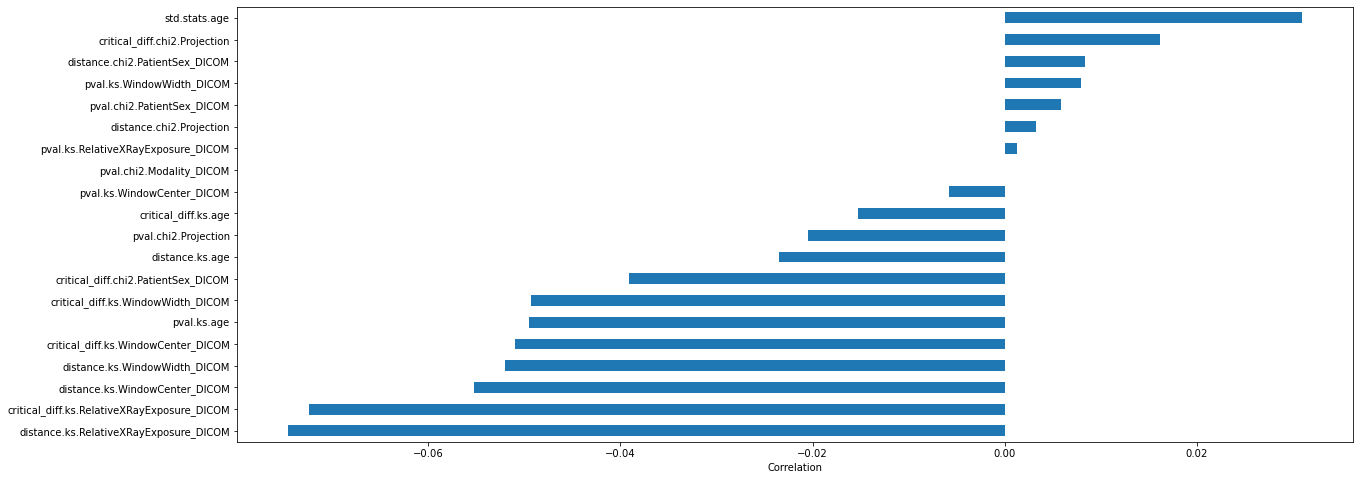

In [43]:
target_col = [c for c in list(output2) if 'auroc' in c][0]
print(target_col)

keep = ['pval', "distance", 'diff', 'stat']
corr_cols = [c for c in list(output2) if target_col not in c and any(k in c for k in keep)]
print(corr_cols)
ax = output2[corr_cols].apply(pd.np.tanh).corrwith(output2[target_col]).dropna().sort_values().plot(kind='barh', figsize=(20, 8))

ax.set_xlabel('Correlation')
plt.show()

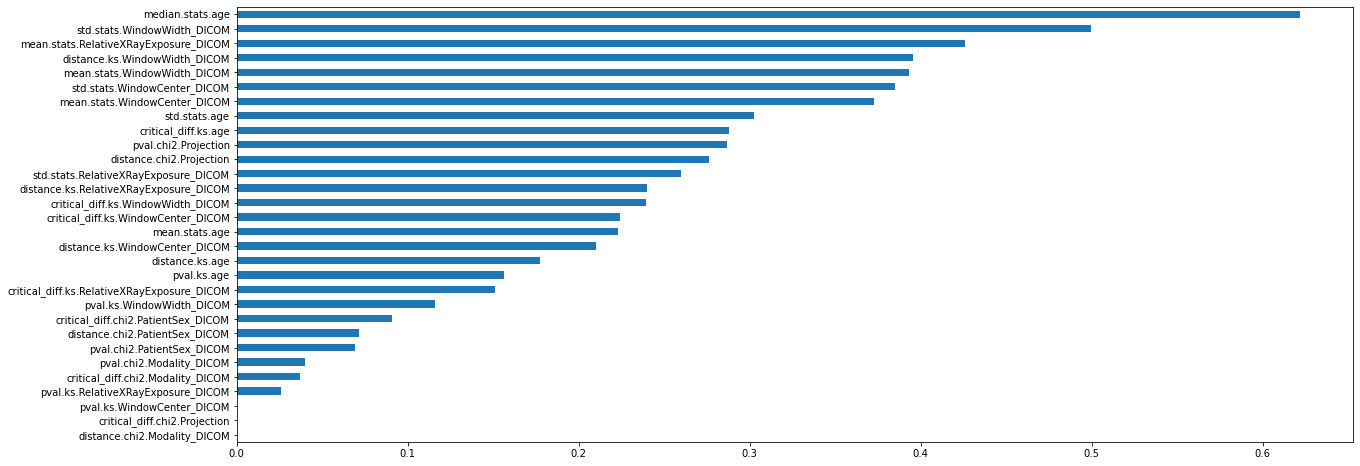

In [113]:
from sklearn.feature_selection import mutual_info_classif

X = output2[corr_cols].dropna(axis=1)
Y = output2[target_col]
Yb = pd.np.digitize(Y, bins=[0.7, .8, 0.9,  .95])
info = mutual_info_classif(X, Yb)

info_gain = dict(zip(list(X), info))
fig, ax = plt.subplots()
pd.Series(info_gain).sort_values().plot(kind='barh',  figsize=(20, 8))

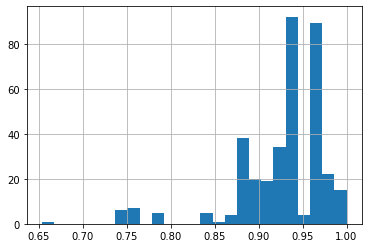

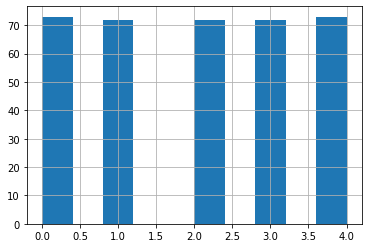

In [83]:
out = pd.qcut(X['ks.critical_diff.RelativeXRayExposure_DICOM'], 5)


out.cat.codes.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021613FAD588>]],
      dtype=object)

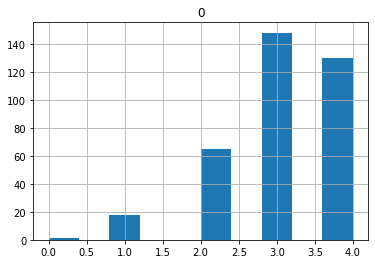

In [69]:
pd.DataFrame(pd.np.digitize(Y, bins=[0.7, .8, 0.9,  .95])).hist()

In [41]:
output.index.min(), output.index.max()

(Timestamp('2009-01-05 00:00:00'), Timestamp('2013-12-31 00:00:00'))

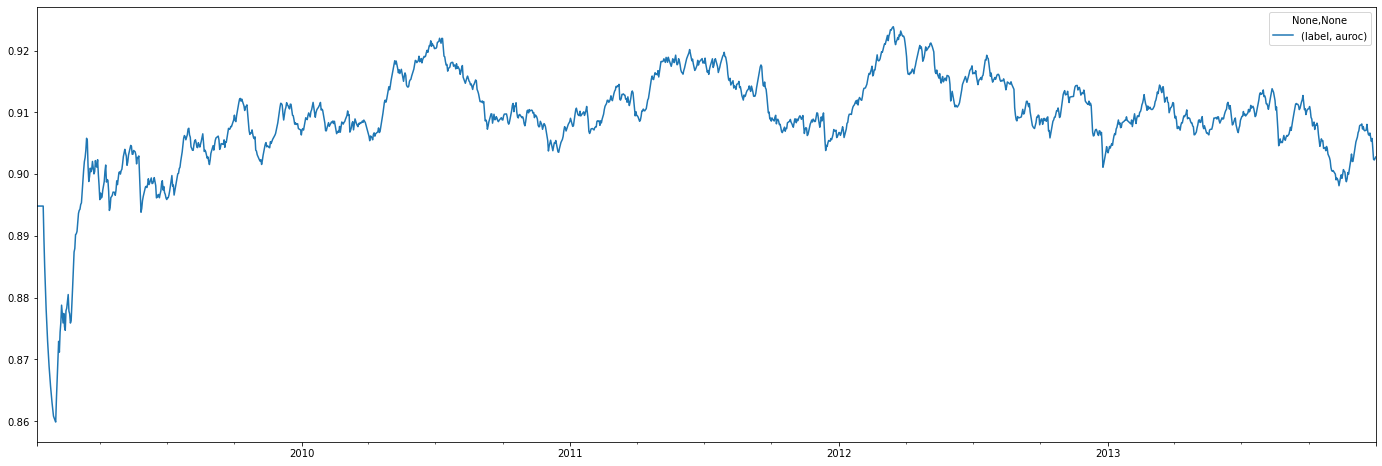

In [37]:
output['score'].ewm(span=200).mean().plot(figsize=(24,8))

In [ ]:
graph_view = output.swaplevel(0,-1, axis=1, ).sort_index(axis=1)
graph_view.head()
graph_view['mean']

In [ ]:
output2 = output.copy()
output2.columns = ['.'.join(c).strip('.') for c in output2.columns.to_flat_index()]
output2.head()

In [ ]:
import random
import tqdm
from model_drift.data.utils import nested2series

def random_sample_apply(dataframe, func, nsamples=100, sample_size_min=500, sample_size_max=500):

    sample_size_min = max(sample_size_min, 1)

    if not isinstance(dataframe.index, pd.DatetimeIndex):
        raise ValueError()

    def _apply(sample_size):
        x = dataframe.sample(sample_size)
        preds = func(x)
        preds["count"] = len(x)
        return nested2series(preds)

    out = {}
    for i in tqdm.trange(nsamples):
        out[i] = _apply(random.randint(sample_size_min, sample_size_max))
    return pd.concat(out, axis=0).unstack(level=0).T

In [ ]:
output = random_sample_apply(val.df, dwc.predict, nsamples=1000, sample_size_max=2000)

In [ ]:
graph_view = output.swaplevel(0,-1, axis=1, ).sort_index(axis=1)
graph_view.head()

In [ ]:
output2 = output.copy()
output2.columns = ['.'.join(c) for c in output2.columns.to_flat_index()]
output2.head()

In [ ]:
target_col = "score.label.auroc"
corr_cols = [c for c in list(output2) if target_col not in c]

corr_cols
ax = output2[corr_cols].corrwith(output2[target_col]).dropna().abs().sort_values().plot(kind='barh', figsize=(20, 8))

ax.set_xlabel('Abs Correlation')

In [ ]:
val.df['age'].hist()

In [ ]:
graph_view = output.swaplevel(0,-1, axis=1, ).sort_index(axis=1)
graph_view.head()

In [ ]:
graph_view['critical_diff']['ks'].plot()

In [ ]:
score_cols = [f"activation.{c}" for c in label_cols]

In [ ]:
label_cols

In [ ]:

score_cols

In [ ]:
import torch
from torchmetrics import AUROC
from torchmetrics.functional import auroc
# auroc?

score_cols = sorted([c for c in list(df) if c.startswith('activation.')])
lbl_cols = sorted([c for c in list(df) if c.startswith('label.')])

def get_auc(sample):
    out = {}
    for c in label_cols:
        s = f"activation.{c}"
        l = c
    # for l, s in zip(lbl_cols, score_cols):
    #     c = l.split('.')[-1]
        try:
            val = auroc(torch.tensor(sample[s].values), torch.tensor(sample[l].values).long()).numpy()
        except Exception as e:
            if "No positive samples in targets" not in str(e):
                raise
            val = float('NaN')
        out[f'auroc.{c}'] = val
    out = pd.Series(out)
    out["auroc.mean"] = out.mean()
    return out


In [ ]:
list(test.df)

In [ ]:
from model_drift.data.utils import rolling_window_dt_apply

In [ ]:
auroc_df = rolling_window_dt_apply(test.df, get_auc, min_periods=500)

In [ ]:
auroc_df

In [ ]:
auroc_df

In [ ]:
auc_cols = [f"auroc.{c}" for c in label_cols]
auc_cols

In [ ]:
for c in auc_cols:
    auroc_df[c] = pd.to_numeric(auroc_df[c], errors='coerce')

auroc_df[auc_cols].astype(float).plot(figsize=(25,8))

In [ ]:
fdf = pc.df.query("Frontal").set_index("StudyDate")
# fdf = pc.df.set_index("StudyDate")
print(len(fdf), len(pc.df))
auroc_df_all = rolling_window_dt_apply(fdf, get_auc, min_periods=500)

In [ ]:
split_dates = pd.to_datetime(settings.PADCHEST_SPLIT_DATES)

p = auroc_df_all[auc_cols].astype(float).mean(axis=1)
ax = p.rolling(1).mean().plot(figsize=(25, 8), label='raw')
roll=30*4
ax = p.rolling(roll).mean().plot(figsize=(25, 8), label='smoothed', ax=ax)


yy = [p.min(), p.max()]
ax.plot([split_dates[0], split_dates[0]], yy, ':k', alpha=.3)
ax.plot([split_dates[1], split_dates[1]], yy, ':k', alpha=.3)

y = yy[0]
ax.text(pd.to_datetime('2011-01-1'), y, "Train", size=25)
ax.text(pd.to_datetime('2013-05-1'), y, "Val", size=25)
ax.text(pd.to_datetime('2016-01-1'), y, "Test", size=25)

# split_dates = pd.to_datetime(['2012-01-01', ' 2013-01-01'])
# ax.plot([split_dates[0], split_dates[0]], [.75, .90], ':r')
# ax.plot([split_dates[1], split_dates[1]], [.75, .90], ':r')

ax.legend()

In [ ]:
# def average_age(x):
m = rolling_window_dt_apply(pc.df, lambda x: {'age': x['age'].mean()}, min_periods=500)


In [ ]:
ax = m[['age']].astype(float).mean(axis=1).rolling(1).mean().plot(figsize=(25, 8), label='raw')
roll=30*4
ax = m[['age']].astype(float).mean(axis=1).rolling(roll).mean().plot(figsize=(25, 8), label='smoothed', ax=ax)

split_dates = pd.to_datetime(settings.PADCHEST_SPLIT_DATES)
ax.plot([split_dates[0], split_dates[0]], [40, 70], ':k', alpha=.3)
ax.plot([split_dates[1], split_dates[1]], [40, 70], ':k', alpha=.3)

y = 45
ax.text(pd.to_datetime('2011-01-1'), y, "Train", size=25)
ax.text(pd.to_datetime('2013-05-1'), y, "Val", size=25)
ax.text(pd.to_datetime('2016-01-1'), y, "Test", size=25)

split_dates = pd.to_datetime(['2012-01-01', ' 2013-01-01'])
ax.plot([split_dates[0], split_dates[0]], [40, 70], ':r')
ax.plot([split_dates[1], split_dates[1]], [40, 70], ':r')

ax.legend()

In [ ]:
df1 = pc.df.query('Frontal')

len(df1)

In [ ]:
df1[df1['No Finding']==0][label_cols].sum()

In [ ]:
df = pd.concat([pd.read_csv("../../data/padchest_10labels_trainval.csv"), pd.read_csv("../../data/padchest_10labels_test.csv")])

len(df)

In [ ]:
df[label_cols].sum()

In [ ]:
df3 = df1.merge(df, on="ImageID", how='inner')

In [ ]:
lx = [l+"_x" for l in label_cols]
ly= [l+"_y" for l in label_cols]

In [ ]:
import itertools

x = list(itertools.chain(*zip(lx, ly)))
x

In [ ]:
df3[x]
(df3[lx].values != df3[ly].values).sum(axis=0)